#Seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#default datsets of seaborn
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
penguins = sns.load_dataset("penguins")

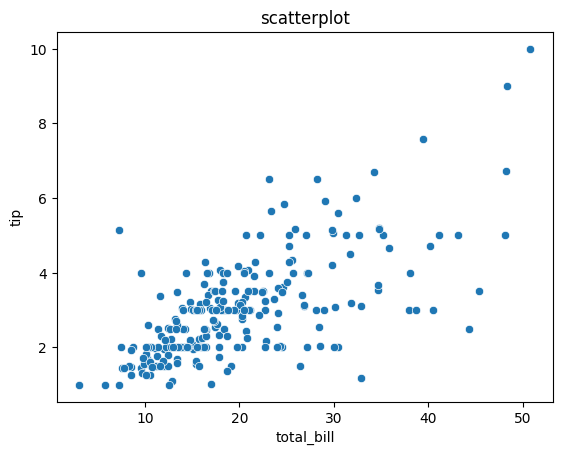

In [4]:
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.title("scatterplot")
plt.show()

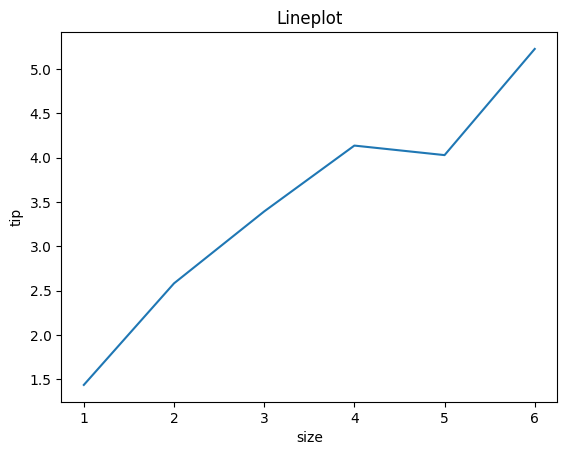

In [5]:
sns.lineplot(x="size", y="tip", data=tips, estimator="mean",errorbar=None)
plt.title("Lineplot")
plt.show()

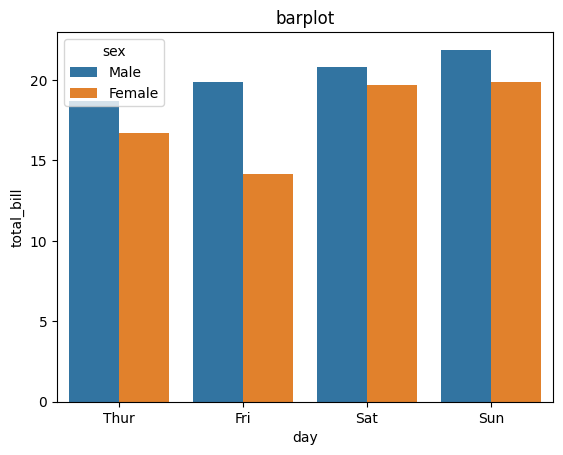

In [7]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, errorbar=None)
plt.title("barplot")
plt.show()

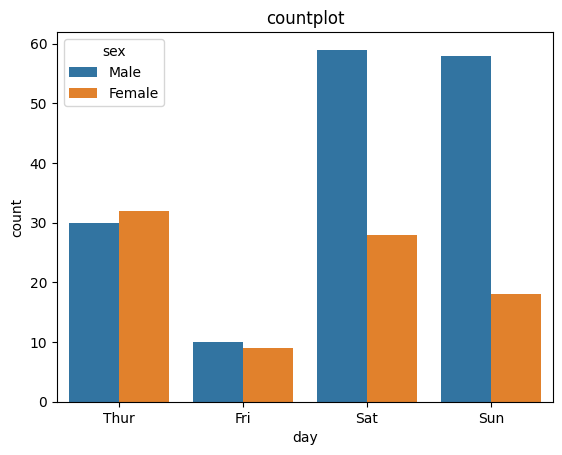

In [8]:
sns.countplot(x="day", hue="sex", data=tips)
plt.title("countplot")
plt.show()

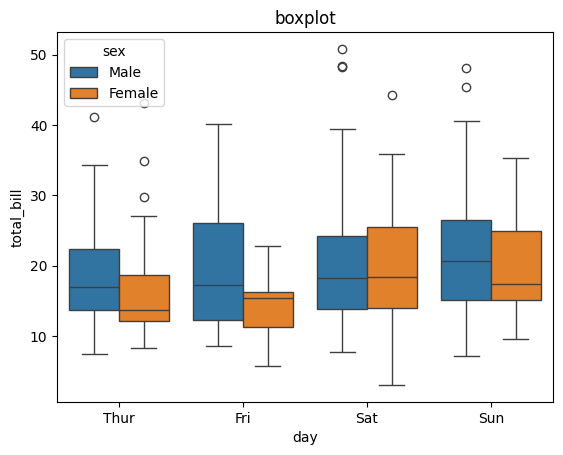

In [9]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("boxplot")
plt.show()

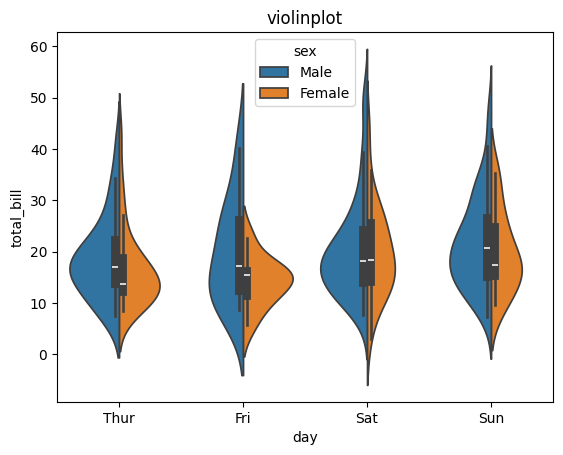

In [10]:
sns.violinplot(x="day", y="total_bill", hue="sex", split=True, data=tips)
plt.title("violinplot")
plt.show()

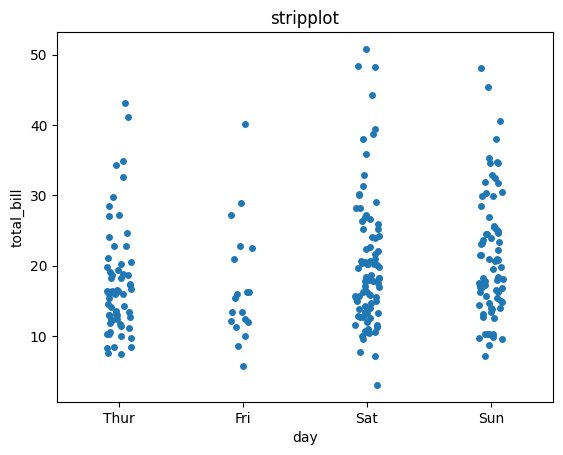

In [11]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("stripplot")
plt.show()

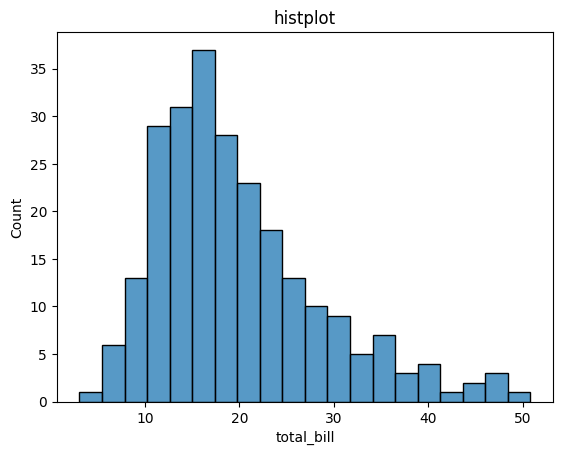

In [12]:
sns.histplot(tips["total_bill"], bins=20, kde=False)
plt.title("histplot")
plt.show()

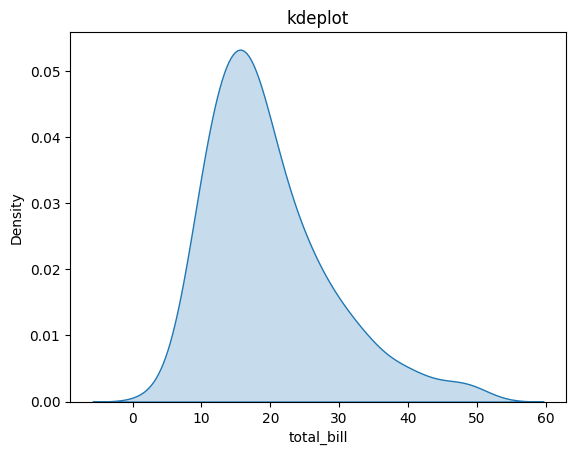

In [13]:
sns.kdeplot(tips["total_bill"], fill=True)
plt.title("kdeplot")
plt.show()

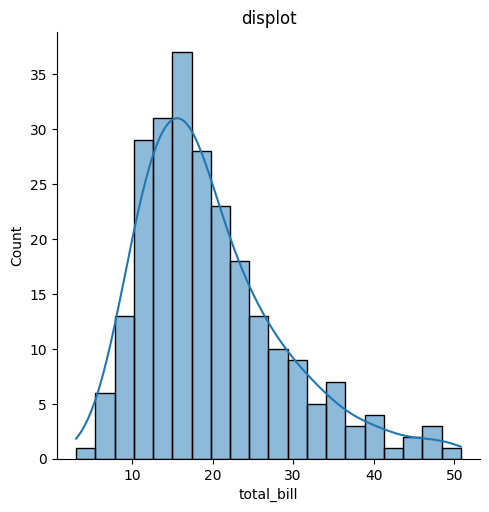

In [14]:
sns.displot(tips["total_bill"], kde=True, bins=20)
plt.title("displot")
plt.show()

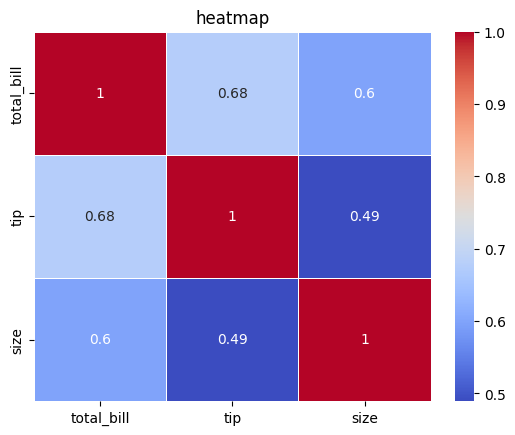

In [15]:
numeric_tips = tips.select_dtypes(include=['number'])
corr = numeric_tips.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("heatmap")
plt.show()

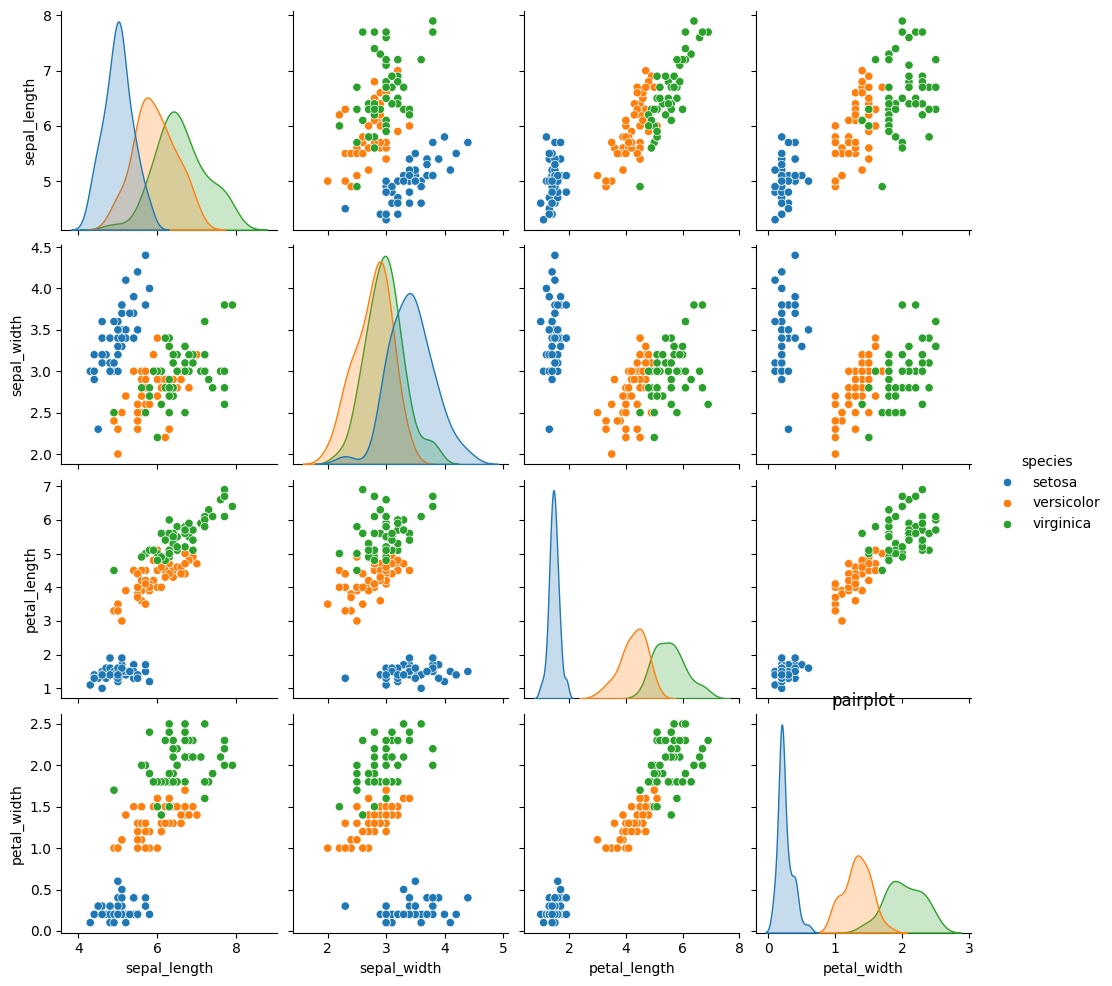

In [16]:
sns.pairplot(iris, hue="species")
plt.title("pairplot")
plt.show()

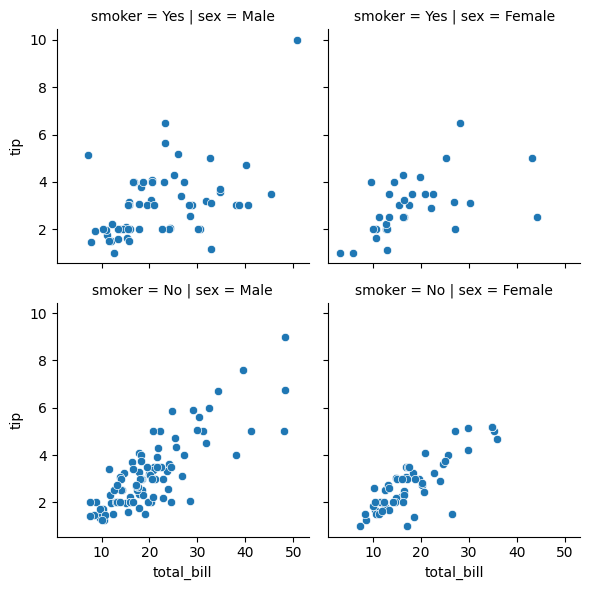

In [19]:
g = sns.FacetGrid(tips, col="sex", row="smoker")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show()

# Pandas


In [20]:
pip install pandas

In [21]:
import pandas as pd

In [22]:
import pandas as pd

s = pd.Series([10, 20, 30, 40], index=["a", "b", "c", "d"])
print(s)

a    10
b    20
c    30
d    40
dtype: int64


In [46]:
data = {
    "Name": ["Alice", "Bob", "Charlie","Charlie",None,],
    "Age": [25, 30, 35,None, None],
    "City": ["NY", "LA", "Chicago","denmark","Ireland"]
}
df = pd.DataFrame(data)
print(df)

      Name   Age     City
0    Alice  25.0       NY
1      Bob  30.0       LA
2  Charlie  35.0  Chicago
3  Charlie   NaN  denmark
4     None   NaN  Ireland


# Basic Data Exploratory Methods

In [47]:
df.head()       # First 5 rows


,Name,Age,City
0,Alice,25.0,NY
1,Bob,30.0,LA
2,Charlie,35.0,Chicago
3,Charlie,NaN,denmark
4,None,NaN,Ireland


In [48]:
df.tail()       # Last 5 rows


,Name,Age,City
0,Alice,25.0,NY
1,Bob,30.0,LA
2,Charlie,35.0,Chicago
3,Charlie,NaN,denmark
4,None,NaN,Ireland


In [49]:
df.shape        # (rows, columns)


(5, 3)

In [50]:
df.info()       # Column data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    4 non-null      object 
 1   Age     3 non-null      float64
 2   City    5 non-null      object 
dtypes: float64(1), object(2)
memory usage: 252.0+ bytes


In [51]:
df.describe()   # Summary statistics

,Age
count,3.0
mean,30.0
std,5.0
min,25.0
25%,27.5
50%,30.0
75%,32.5
max,35.0


In [52]:
df.columns      # Column names

Index(['Name', 'Age', 'City'], dtype='object')

In [53]:
df.index        # Row labels

RangeIndex(start=0, stop=5, step=1)

## Data Cleaning Methods

In [54]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Name    1
Age     2
City    0
dtype: int64


In [55]:
# Fill missing values (example: fill with a placeholder)
# In this example, there are no missing values, but this is how you would do it
df_filled = df.fillna("Missing")
print("\nDataFrame after filling missing values:")
print(df_filled)


DataFrame after filling missing values:
      Name      Age     City
0    Alice     25.0       NY
1      Bob     30.0       LA
2  Charlie     35.0  Chicago
3  Charlie  Missing  denmark
4  Missing  Missing  Ireland


In [56]:
# Drop rows with missing values (example)
# In this example, there are no missing values, but this is how you would do it
df_dropped = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped)


DataFrame after dropping rows with missing values:
      Name   Age     City
0    Alice  25.0       NY
1      Bob  30.0       LA
2  Charlie  35.0  Chicago


In [57]:
# Check for duplicate rows
print("\nNumber of duplicate rows before cleaning:")
print(df.duplicated().sum())


Number of duplicate rows before cleaning:
0


In [61]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates(subset=['Name'])
print("\nDataFrame after removing duplicate rows based on 'Name':")
print(df_cleaned)


DataFrame after removing duplicate rows based on 'Name':
      Name   Age     City  Name_Length  Age_Plus_5
0    Alice  25.0       NY          5.0        30.0
1      Bob  30.0       LA          3.0        35.0
2  Charlie  35.0  Chicago          7.0        40.0
4     None   NaN  Ireland          NaN         NaN


In [72]:
import pandas as pd
import numpy as np

data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40],
    "Salary": [50000, 60000, 70000, 80000],
    "Department": ["HR", "IT", "Finance", "IT"]
}

df = pd.DataFrame(data)
print(df)

      Name  Age  Salary Department
0    Alice   25   50000         HR
1      Bob   30   60000         IT
2  Charlie   35   70000    Finance
3    David   40   80000         IT


In [73]:
#1.Scaling (Normalization / Standardization)
#Transform numerical values to a common scale.
df["Salary_Scaled"] = df["Salary"] / df["Salary"].max()
print(df[["Name", "Salary", "Salary_Scaled"]])

      Name  Salary  Salary_Scaled
0    Alice   50000          0.625
1      Bob   60000          0.750
2  Charlie   70000          0.875
3    David   80000          1.000


In [74]:
#2. Encoding Categorical Variables
#Convert categories into numeric values.
df["Dept_Code"] = df["Department"].astype("category").cat.codes
print(df[["Department", "Dept_Code"]])

  Department  Dept_Code
0         HR          1
1         IT          2
2    Finance          0
3         IT          2


In [76]:
#3. Applying Mathematical Functions
#Apply transformations to columns.
import numpy as np
df["Salary_Log"] = df["Salary"].apply(lambda x: round(np.log(x), 2))
print(df[["Salary", "Salary_Log"]])

   Salary  Salary_Log
0   50000       10.82
1   60000       11.00
2   70000       11.16
3   80000       11.29


In [77]:
#4. String Transformation
#Standardizing or modifying text.
df["Name_Upper"] = df["Name"].str.upper()
print(df[["Name", "Name_Upper"]])

      Name Name_Upper
0    Alice      ALICE
1      Bob        BOB
2  Charlie    CHARLIE
3    David      DAVID


In [70]:
#5. Binning (Discretization)
#Group continuous values into categories.
df["Age_Group"] = pd.cut(df["Age"], bins=[20, 30, 40, 50], labels=["Young", "Mid", "Senior"])
print(df[["Age", "Age_Group"]])

   Age Age_Group
0   25     Young
1   30     Young
2   35       Mid
3   40       Mid


In [78]:
#6. Aggregation / Transformation with GroupBy
dept_salary = df.groupby("Department")["Salary"].mean().reset_index()
print(dept_salary)


  Department   Salary
0    Finance  70000.0
1         HR  50000.0
2         IT  70000.0


#Data Grouping and Aggregation Methods


In [79]:
import pandas as pd

data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva", "Frank"],
    "Department": ["HR", "IT", "Finance", "IT", "Finance", "HR"],
    "Age": [25, 30, 35, 40, 28, 32],
    "Salary": [50000, 60000, 70000, 80000, 65000, 52000]
}

df = pd.DataFrame(data)
print(df)

      Name Department  Age  Salary
0    Alice         HR   25   50000
1      Bob         IT   30   60000
2  Charlie    Finance   35   70000
3    David         IT   40   80000
4      Eva    Finance   28   65000
5    Frank         HR   32   52000


In [80]:
#1. Grouping by One Column
#Group data by a single column and apply an aggregation.
df.groupby("Department")["Salary"].mean()

,Salary
Department,
Finance,67500.0
HR,51000.0
IT,70000.0


In [81]:
#2. Grouping by Multiple Columns
#Group by more than one column.

df.groupby(["Department", "Age"])["Salary"].sum()

Department  Age
Finance     28     65000
            35     70000
HR          25     50000
            32     52000
IT          30     60000
            40     80000
Name: Salary, dtype: int64

In [82]:
#3. Using Multiple Aggregations
df.groupby("Department")["Salary"].agg(["mean", "max", "min", "count"])

,mean,max,min,count
Department,,,,
Finance,67500.0,70000,65000,2
HR,51000.0,52000,50000,2
IT,70000.0,80000,60000,2


In [83]:
#4. Aggregating Multiple Columns
df.groupby("Department").agg({
    "Age": "mean",
    "Salary": "sum"
})

,Age,Salary
Department,,
Finance,31.5,135000
HR,28.5,102000
IT,35.0,140000


In [84]:
#5. Resetting Index After Grouping
#To convert grouped result back into a DataFrame:

df.groupby("Department")["Salary"].mean().reset_index()

,Department,Salary
0,Finance,67500.0
1,HR,51000.0
2,IT,70000.0


In [85]:
#6. Group with size()
#Counts how many entries in each group.

df.groupby("Department").size()

,0
Department,
Finance,2
HR,2
IT,2


In [86]:
#7. Group with describe()
#Gives detailed statistics for each group.
df.groupby("Department")["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Finance,2.0,67500.0,3535.533906,65000.0,66250.0,67500.0,68750.0,70000.0
HR,2.0,51000.0,1414.213562,50000.0,50500.0,51000.0,51500.0,52000.0
IT,2.0,70000.0,14142.135624,60000.0,65000.0,70000.0,75000.0,80000.0


# Merging and Joining Data Methods

In [88]:
import pandas as pd

# Employees table
employees = pd.DataFrame({
    "EmpID": [1, 2, 3, 4],
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "DeptID": [101, 102, 103, 102]
})

# Departments table
departments = pd.DataFrame({
    "DeptID": [101, 102, 104],
    "Department": ["HR", "IT", "Finance"]
})



>Merging Methods



In [89]:
#1. Inner Merge (Default)
#Keeps only matching rows from both DataFrames.

pd.merge(employees, departments, on="DeptID", how="inner")

,EmpID,Name,DeptID,Department
0,1,Alice,101,HR
1,2,Bob,102,IT
2,4,David,102,IT


In [90]:
#2. Left Merge
#Keeps all rows from left DataFrame (employees) and matches from right.

pd.merge(employees, departments, on="DeptID", how="left")

,EmpID,Name,DeptID,Department
0,1,Alice,101,HR
1,2,Bob,102,IT
2,3,Charlie,103,NaN
3,4,David,102,IT


In [91]:
#3. Right Merge
#Keeps all rows from right DataFrame (departments) and matches from left.

pd.merge(employees, departments, on="DeptID", how="right")

,EmpID,Name,DeptID,Department
0,1.0,Alice,101,HR
1,2.0,Bob,102,IT
2,4.0,David,102,IT
3,NaN,NaN,104,Finance


In [92]:
#4. Outer Merge
#Keeps all rows from both DataFrames, filling missing values with NaN.

pd.merge(employees, departments, on="DeptID", how="outer")

,EmpID,Name,DeptID,Department
0,1.0,Alice,101,HR
1,2.0,Bob,102,IT
2,4.0,David,102,IT
3,3.0,Charlie,103,NaN
4,NaN,NaN,104,Finance




> Joining Methods



In [96]:
#Sample Data for Joining
left = pd.DataFrame({"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=[0, 1, 2])
right = pd.DataFrame({"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=[0, 2, 3])

In [97]:
#1. Default Join (Left Join on Index)
left.join(right)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,NaN,NaN
2,A2,B2,C2,D2


In [98]:
#2. Outer Join on Index
left.join(right, how="outer")

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,NaN,NaN
2,A2,B2,C2,D2
3,NaN,NaN,C3,D3


In [99]:
#3. Inner Join on Index
left.join(right, how="inner")

,A,B,C,D
0,A0,B0,C0,D0
2,A2,B2,C2,D2


**# Time Series Data Handling methods**

In [100]:
import pandas as pd

# Create a date range
dates = pd.date_range("2023-01-01", periods=6, freq="D")

# Example DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Sales": [250, 300, 400, 350, 500, 450]
})
df.set_index("Date", inplace=True)
print(df)


            Sales
Date             
2023-01-01    250
2023-01-02    300
2023-01-03    400
2023-01-04    350
2023-01-05    500
2023-01-06    450


In [101]:
#1. Converting to DateTime
#Make sure your column is in proper datetime format.
df.index = pd.to_datetime(df.index)

In [102]:
#2. Resampling (Change Frequency)
#Aggregate data into different time intervals.
df.resample("2D").sum()   # Every 2 days, sum sales

,Sales
Date,
2023-01-01,550
2023-01-03,750
2023-01-05,950


In [109]:
#Shifting Data
#Shift values forward or backward in time.
df["Shifted"] = df["Sales"].shift(1)
print(df)

            Sales  Shifted        MA_3
Date                                  
2023-01-01    250      NaN         NaN
2023-01-02    300    250.0         NaN
2023-01-03    400    300.0  316.666667
2023-01-04    350    400.0  350.000000
2023-01-05    500    350.0  416.666667
2023-01-06    450    500.0  433.333333


In [111]:
#4. Rolling / Moving Average
#Smooths data over a window.
df["MA_3"] = df["Sales"].rolling(window=3).mean()
print(df)

            Sales  Shifted        MA_3
Date                                  
2023-01-01    250      NaN         NaN
2023-01-02    300    250.0         NaN
2023-01-03    400    300.0  316.666667
2023-01-04    350    400.0  350.000000
2023-01-05    500    350.0  416.666667
2023-01-06    450    500.0  433.333333


In [112]:
#5. Time-based Indexing & Slicing
print(df["2023-01-02":"2023-01-04"])   # Select specific date range

            Sales  Shifted        MA_3
Date                                  
2023-01-02    300    250.0         NaN
2023-01-03    400    300.0  316.666667
2023-01-04    350    400.0  350.000000


In [113]:
#6. Handling Missing Dates
#Fill gaps in dates.
date_range = pd.date_range("2023-01-01", "2023-01-07")
df = df.reindex(date_range)
df["Sales"].fillna(method="ffill", inplace=True)  # Forward fill

/tmp/ipython-input-757607826.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sales"].fillna(method="ffill", inplace=True)  # Forward fill
/tmp/ipython-input-757607826.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Sales"].fillna(method="ffill", inplace=True)  # Forward fill


In [114]:
#7. Extracting Date Parts
df = df.reset_index().rename(columns={"index":"Date"})
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
print(df.head())

        Date  Sales  Shifted        MA_3  Year  Month  Day
0 2023-01-01  250.0      NaN         NaN  2023      1    1
1 2023-01-02  300.0    250.0         NaN  2023      1    2
2 2023-01-03  400.0    300.0  316.666667  2023      1    3
3 2023-01-04  350.0    400.0  350.000000  2023      1    4
4 2023-01-05  500.0    350.0  416.666667  2023      1    5
